<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">CLASSIFICATION MASTER NOTEBOOK #1</h1></center>

Hey! In this notebook I have covered three Machine Learning Classification Algorithms. I explained classification algorithms, evaluation metrics, skewness, encoding and hyper-parameter optimization and I performed these techniques in theree different datasets. Three different datasets are used in this notebook:

1. Breast Cancer Wisconsin (Diagnostic) Data Set
1. Iris Species
1. Stroke Prediction Dataset

## In each topic I used similar templates such as:

* Information About Dataset
* Data Visualization
* Data Preprocessing (fillna, encoding, skew, anomaly detection)
* Train-Test Split
* Model
* Evaluation of Model
* Hyper-Parameter Optimization

## Examined algorihms are:

#### Support Vector Machines
#### K Nearest Neighbour
#### Logistic Regression

You will find out detailed information about classification evaluation metrics in KNN section.

All parameters of algorithms have explained in the Hyper-Parameter Optimization section.


## Before starting:

* Main headings are indicated with a black background.
* The following color palettes are used for each main title.

Headers Palette


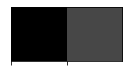

Support Vector Machine Palette


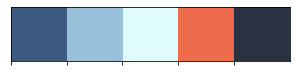

K Nearest Neighbour Palette


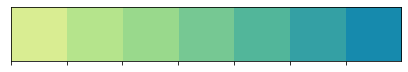

Logistic Regression Palette


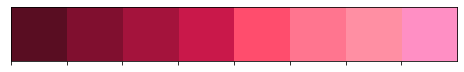

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['#000000', '#474747']
print("Headers Palette")
sns.palplot(sns.color_palette(headers));
plt.show()

svm = ['#3d5a80', '#98c1d9', '#e0fbfc', '#ee6c4d', '#293241']
print("Support Vector Machine Palette")
sns.palplot(sns.color_palette(svm));
plt.show()

knn = ['#d9ed92', '#b5e48c', '#99d98c', '#76c893', '#52b69a', '#34a0a4', '#168aad']
print("K Nearest Neighbour Palette")
sns.palplot(sns.color_palette(knn));
plt.show()


lr = ['#590d22', '#800f2f', '#a4133c', '#c9184a', '#ff4d6d', '#ff758f', '#ff8fa3', '#ff8fc4']
print("Logistic Regression Palette")
sns.palplot(sns.color_palette(lr));
plt.show()



<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">Support Vector Machine</h1></center>

In machine learning, support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of either category, an SVM training algorithm creates a model that assigns new examples to one category or the other, turning it into a nonprobabilistic binary linear classifier.

Besides performing linear classification, SVMs can efficiently perform nonlinear classification using so-called kernel tricks and implicitly map their inputs to higher-dimensional feature spaces.

When data is not labeled, supervised learning is not possible and an unsupervised learning approach is required that attempts to cluster data into groups and then match those groups with new data. The clustering algorithm that provides an improvement to support vector machines is called support vector clustering and is used for industry applications when either data is not flagged or only some data is labeled as a preprocessing for a classification.


The “Support Vector Machine” is a supervised machine learning algorithm that can be used for classification or regression problems. However, it is mostly used in classification problems. In this algorithm, each data item is plotted as a point in the n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Next, the classification is performed by finding the hyperplane that distinguishes the two classes quite well.

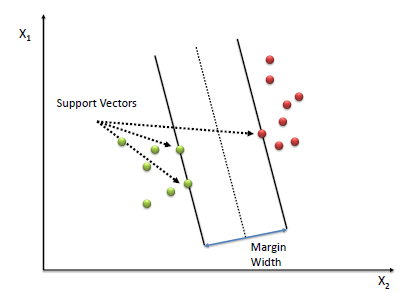

*Source for picture:* https://medium.com/@ekrem.hatipoglu/machine-learning-classification-support-vector-machine-kernel-trick-part-10-7ab928333158

Support Vectors are just the coordinates of the observation. The Support Vector Machine is a boundary that best separates the two classes (hyperplane/line).

SVMs are used in many classification problems from facial recognition systems to voice analysis.

### Advantages:

* They are effective when the number of dimensions is greater than the number of samples.
* They are usefull in high-dimensional spaces.
* They are versatile. Many different kernel functions can be used for the decision function.
* A number of training points are used in the decision function. Therefore, memory is used efficiently.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv
/kaggle/input/breast-cancer-wisconsin-data/data.csv
/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


<center><h1 style = "background:#3d5a80 ;color:white;border:0;font-weight:bold">Information About Dataset</h1></center>

In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
123,124,6.3,2.7,4.9,1.8,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
129,130,7.2,3.0,5.8,1.6,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
119,120,6.0,2.2,5.0,1.5,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.drop('Id', inplace = True, axis = 1)

<center><h1 style = "background:#98c1d9 ;color:black;border:0;font-weight:bold">Data Visualization</h1></center>

In [7]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']

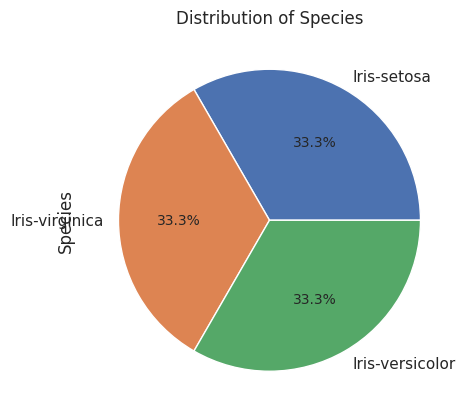

In [8]:
plt.figure(1, figsize=(5,5), dpi = 100)
plt.title("Distribution of Species")
df['Species'].value_counts().plot.pie(autopct="%1.1f%%");

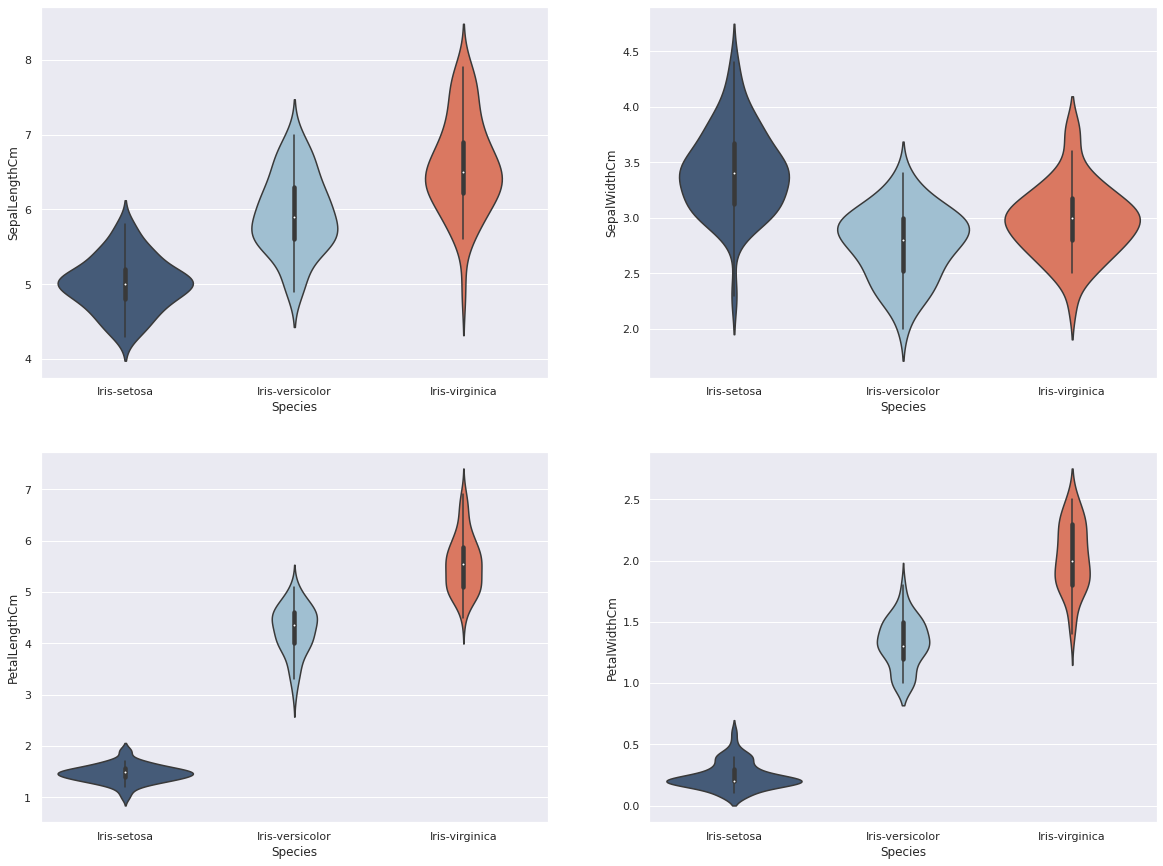

In [9]:
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = df, palette=svm_palette)
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = df, palette=svm_palette)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = df, palette=svm_palette)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = df, palette=svm_palette);

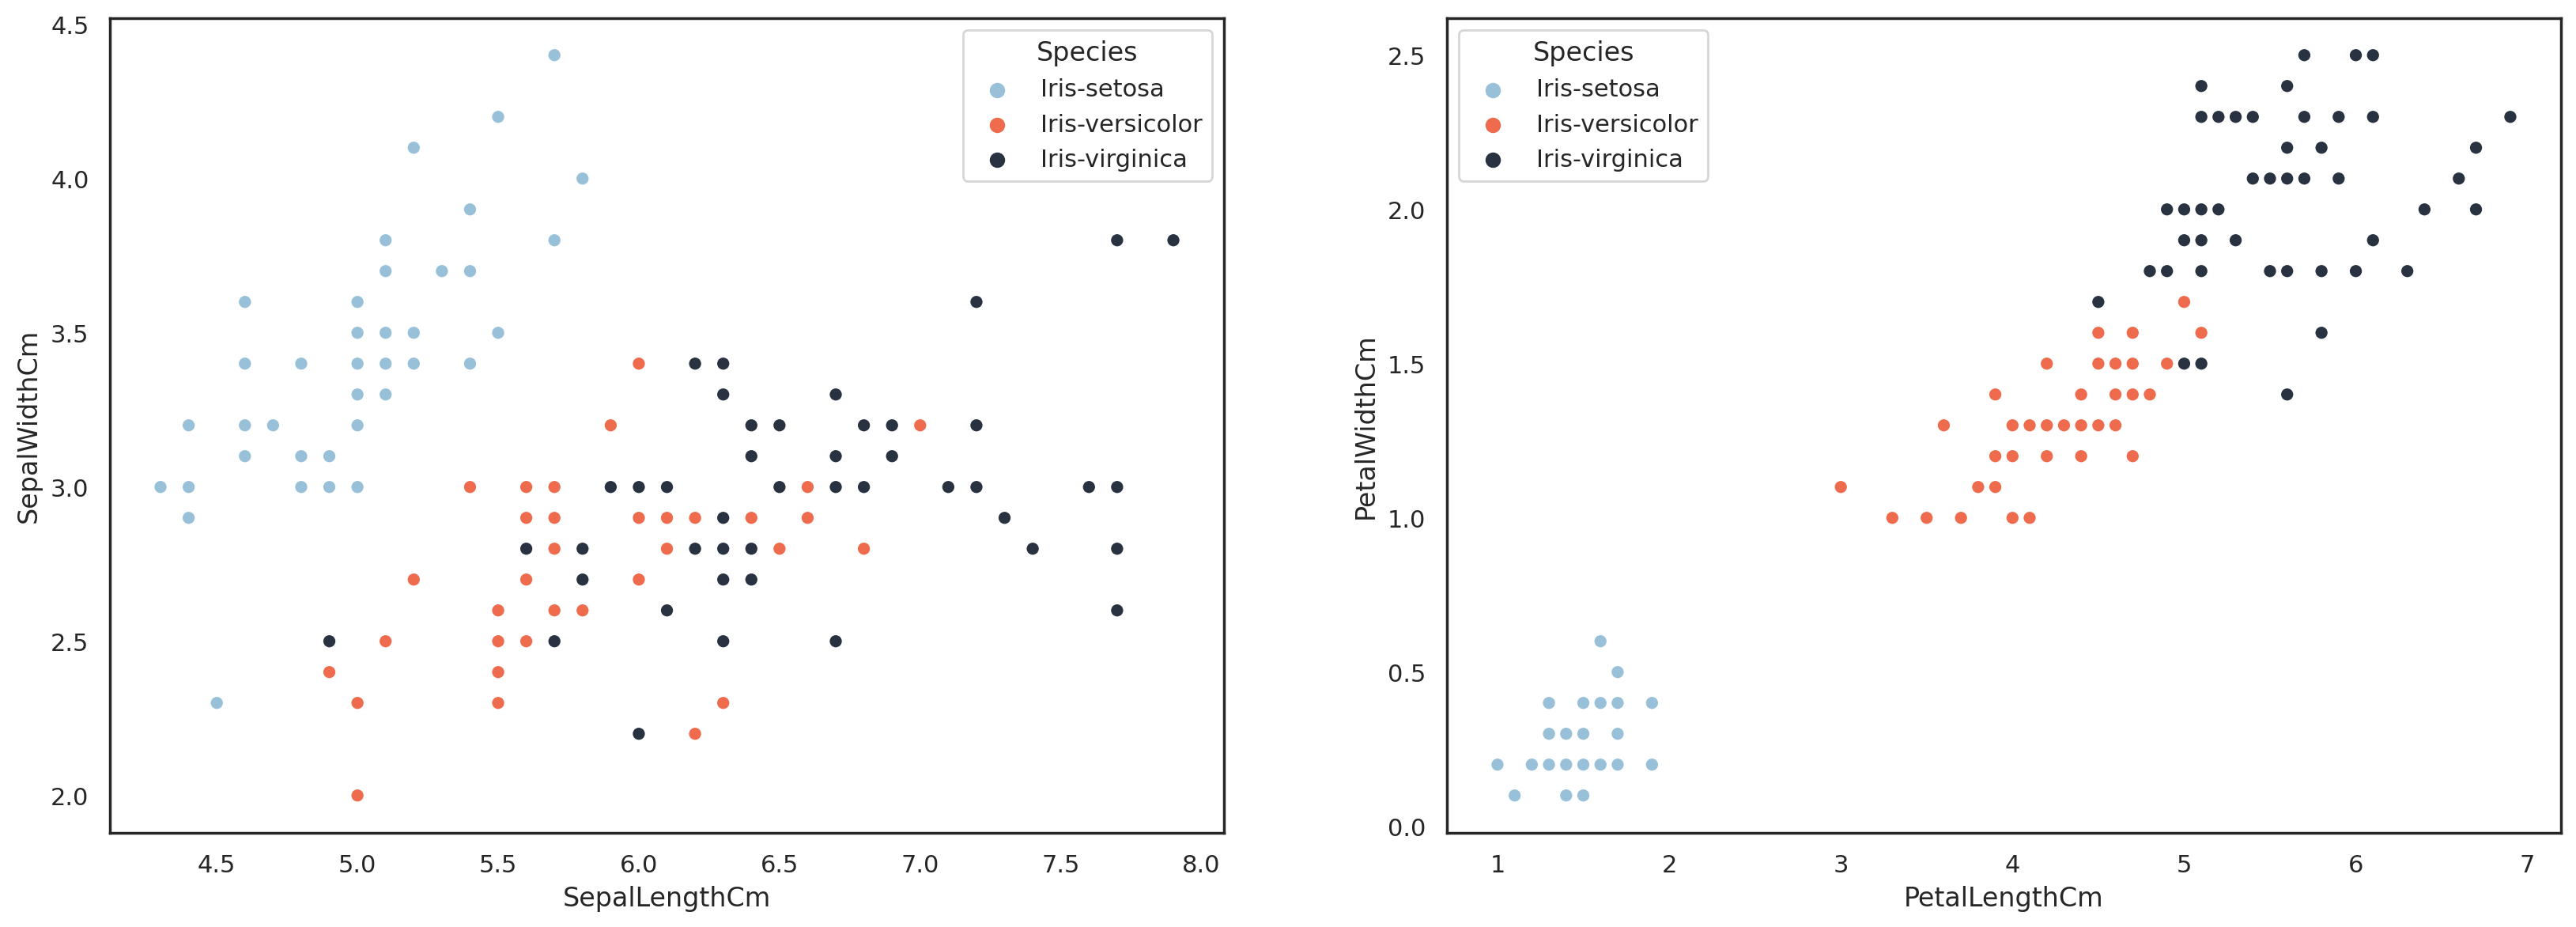

In [10]:
plt.figure(figsize=(20,15), dpi = 200)
sns.set_style('white')
plt.subplot(2,2,1)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df, palette=svm_palette[1:])
plt.subplot(2,2,2)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df, palette=svm_palette[1:]);

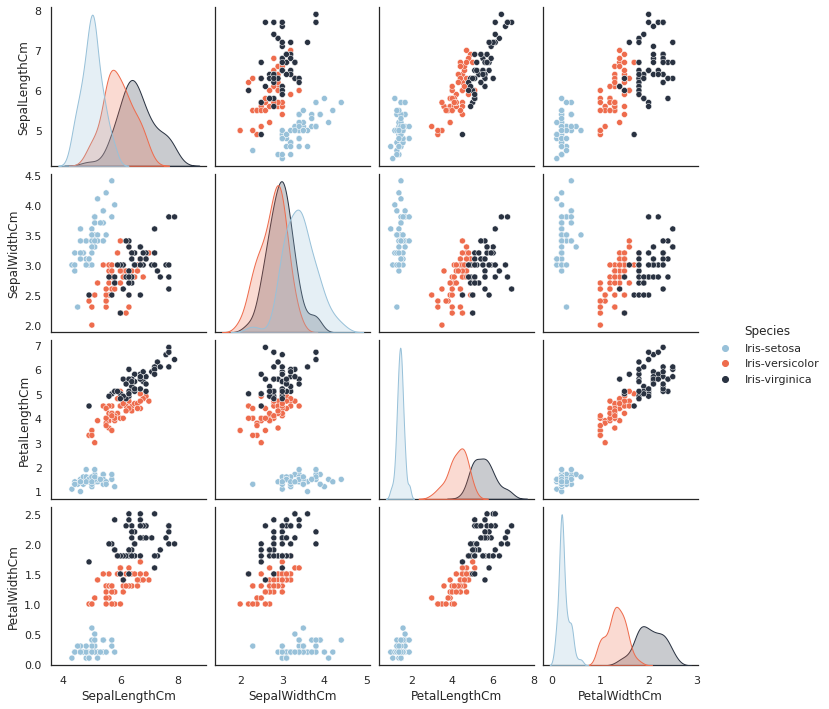

In [11]:
sns.pairplot(df, hue = 'Species', vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], palette=svm_palette[1:] );

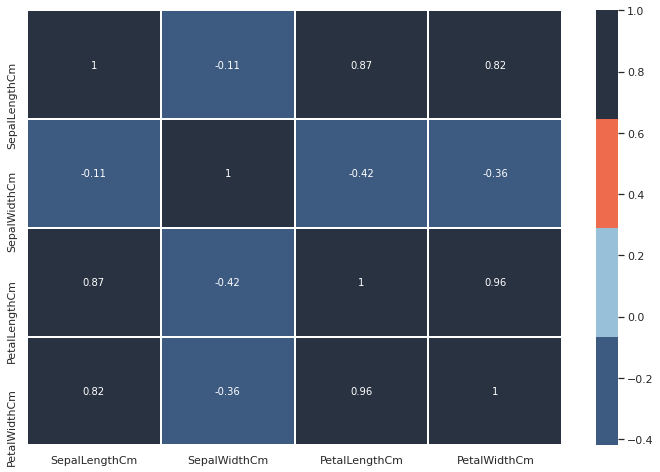

In [12]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap=svm_palette, linewidths = 2)
plt.show()

<center><h1 style = "background:#e0fbfc ;color:black;border:0;font-weight:bold">Train-Test Split</h1></center>

In [13]:
X = df.iloc[:,0:4].values 
y = df.iloc[:,4:].values 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 150
**************************************************
Total # of sample in train dataset: 97
Shape of X_train: (97, 4)
**************************************************
Total # of sample in test dataset: 53
Shape of X_test: (53, 4)


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<center><h1 style = "background:#ee6c4d ;color:white;border:0;font-weight:bold">Support Vector Machine</h1></center>

A simple linear SVM classifier connects two classes by drawing a straight line between them. That is, all of the data points on one side of the line will be assigned to a category, while the data points on the other side of the line will be assigned to a different category. This implies that there may be an unlimited number of lines from which to pick.

What distinguishes the linear SVM method from other algorithms, such as k-nearest neighbors, is that it selects the optimal line to categorize your data points. It selects the line that divides the data and is as far away from the closest data points as possible.

A 2-D example can help you understand all of the machine learning terms. In essence, you have some data points on a grid. You're attempting to sort these data points into the appropriate categories, but you don't want any data in the wrong category. That is, you are attempting to identify the line connecting the two closest points that will keep the other data points separated.

## SVM Types

SVMs are classified into two kinds, each of which is used for a different purpose:

* Simple SVM: This type of SVM is commonly used for linear regression and classification tasks.

* Kernel SVM: Has additional flexibility for non-linear data since it can fit a hyperplane rather than a two-dimensional space.



<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Pros</th>
    <th>Cons</th>
  </tr>
  <tr>
    <td>Effective on datasets with multiple features, like financial or medical data.</td>
    <td>If the number of features is a lot bigger than the number of data points, avoiding over-fitting when choosing kernel functions and regularization term is crucial.</td>
  </tr>
  <tr>
    <td>Effective in cases where number of features is greater than the number of data points.</td>
    <td>SVMs don't directly provide probability estimates. Those are calculated using an expensive five-fold cross-validation.</td>
  </tr>
  <tr>
    <td>Uses a subset of training points in the decision function called support vectors which makes it memory efficient.</td>
    <td>Works best on small sample sets because of its high training time.</td>
  </tr>
  <tr>
    <td>Different kernel functions can be specified for the decision function. You can use common kernels, but it's also possible to specify custom kernels.</td>
    <td></td>
  </tr>
</table>

</body>
</html>


In [16]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 96.90721649484536
Test score of trained model: 98.11320754716981


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confussion Matrix: 
[[16  0  0]
 [ 0 22  0]
 [ 0  1 14]]



<AxesSubplot:>

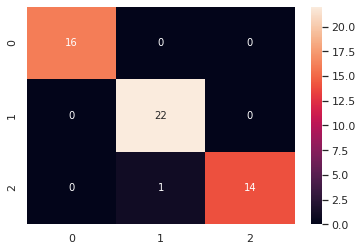

In [17]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(pred, y_test)

print(f'Confussion Matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.96      0.98        23
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        53
      macro avg       0.98      0.99      0.98        53
   weighted avg       0.98      0.98      0.98        53



<center><h1 style = "background:#474747 ;color:white;border:0;font-weight:bold">Hyper-Parameter Optimization</h1></center>

Unlike parameters, hyperparameters are not learned during training the model. They are determined by the data scientist before the modeling phase. For example, KNN algorithm, which is one of the non-parametric classification algorithms, makes classification by looking at the nearest k neighbors to the desired value. Here, the k number (n_neighbors:) and the distance metric (metric:) to be used are the hyperparameters that should be specified by the data scientist before the modeling, which increases the performance of the model.

Hyperparameter optimization is the process of finding the most suitable hyperparameter combination according to the success metric specified for a machine learning algorithm.

Given that there are dozens of hyperparameters for a machine learning algorithm and dozens of values these hyperparameters can take, it's clear how difficult it will be to try all combinations one by one and pick the best combination. For this reason, different methods have been developed for hyperparameter optimization. GridSearcCV and RandomizedSearchCV are among these methods.

## GridSearchCV

For the hyperparameters and their values that are desired to be tested in the model, a separate model is established with all combinations and the most successful hyperparameter set is determined according to the specified metric.

## Parameters of sklearn.SVC

<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Parameter</th>
    <th>Explanation</th>
    <th>Default</th>
  </tr>
  <tr>
    <td>Gamma</td>
    <td>The gamma can be thought of as the "spreading" of the kernel and hence the decision zone. It is a parameter for nonlinear hyperplanes. The higher the gamma value, the more it tries to fit the training dataset exactly.</td>
    <td>'scale'</td>
  </tr>
  <tr>
    <td>C</td>
    <td>C is the penalty parameter expressing the misclassification or error rate. Misclassification or error rate determines how many errors SVM optimization can accept. It controls the exchange between the decision boundary and the misclassification term.</td>
    <td>1.0 (float)</td>
  </tr>
  <tr>
    <td>Kernel</td>
    <td>The main function of the kernel is to take the lower dimensional input space and transform it into a higher dimensional space. It is mostly useful in nonlinear separation problem.</td>
    <td>'rbf'</td>
  </tr>
  <tr>
    <td>Shrinking</td>
    <td>Determines whether to use the shrinking heuristic. It takes a Boolean value.</td>
    <td>'True' (bool)</td>
  </tr>
  <tr>
    <td>Probability</td>
    <td>Whether to enable probability estimates.</td>
    <td>'False' (bool)</td>
  </tr>
  <tr>
    <td>Verbose</td>
    <td>Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.</td>
    <td>'False' (bool)</td>
  </tr>
   <tr>
    <td>Degree</td>
    <td>Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.</td>
    <td>3 (int)</td>
  </tr>
</table>

</body>
</html>


## Notes:
* If the C is higher, the optimization will choose smaller margin hyperplane, so training data miss classification rate will be lower. On the other hand, if the C is low, then the margin will be big, even if there will be miss classified training data examples.
* High Gamma will consider only points close to the plausible hyperplane and low Gamma will consider points at greater distance.

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear', 'poly','sigmoid'],
              'shrinking': [True, False],
              'degree': [1,2,3],
              'probability': [True, False],
              'verbose': [True, False],}

gcv = GridSearchCV(model, parameters, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 8460 tasks      | elapsed:   16.2s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:   29.5s finished
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [20]:
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')

GridSearchView Best Score: 95.84210526315789
GridSearchView Best Estimator: SVC(C=10, degree=1, gamma=0.1, probability=True, verbose=True)
GridSearchView Best Params: {'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True, 'shrinking': True, 'verbose': True}


<AxesSubplot:>

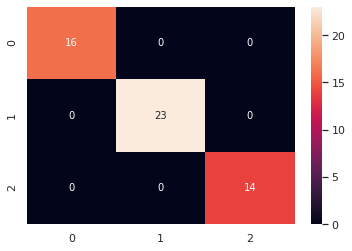

In [21]:
grid_predictions = gcv.predict(X_test)

cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)

In [22]:
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        23
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        53
      macro avg       1.00      1.00      1.00        53
   weighted avg       1.00      1.00      1.00        53



<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">K Nearest Neighbours</h1></center>

In [23]:
knn_palette = ['#d9ed92', '#b5e48c', '#99d98c', '#76c893', '#52b69a', '#34a0a4', '#168aad']

<center><h1 style = "background:#d9ed92 ;color:black;border:0;font-weight:bold">Information About Dataset</h1></center>

In [24]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1884,48739,Male,47.0,0,0,Yes,Self-employed,Urban,135.19,36.0,smokes,0
336,32689,Female,48.0,0,0,Yes,Private,Urban,84.38,27.1,Unknown,0
3135,33704,Male,44.0,1,0,Yes,Private,Rural,84.10,NaN,Unknown,0
4426,13846,Male,43.0,0,0,Yes,Govt_job,Rural,88.00,30.6,never smoked,0
1644,4538,Female,29.0,0,0,No,Private,Urban,81.43,NaN,formerly smoked,0
3093,27721,Male,32.0,0,0,Yes,Private,Rural,83.13,32.0,smokes,0
2125,46363,Male,37.0,0,0,Yes,Private,Rural,66.17,26.1,never smoked,0
1230,59878,Female,56.0,0,0,Yes,Self-employed,Urban,124.16,23.0,never smoked,0
3879,24920,Female,35.0,0,0,Yes,Govt_job,Rural,97.60,44.8,smokes,0
1875,39242,Male,80.0,1,1,Yes,Private,Urban,86.68,27.7,formerly smoked,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [26]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [27]:
df.drop("id", axis=1, inplace=True)

<center><h1 style = "background:#b5e48c ;color:black;border:0;font-weight:bold">Data Visualization</h1></center>

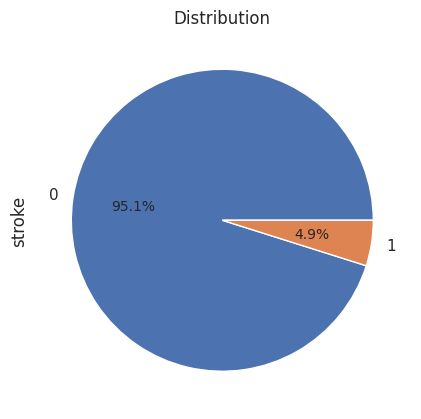

In [28]:
plt.figure(1, figsize=(5,5), dpi = 100)
plt.title("Distribution")
df['stroke'].value_counts().plot.pie(autopct="%1.1f%%");

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


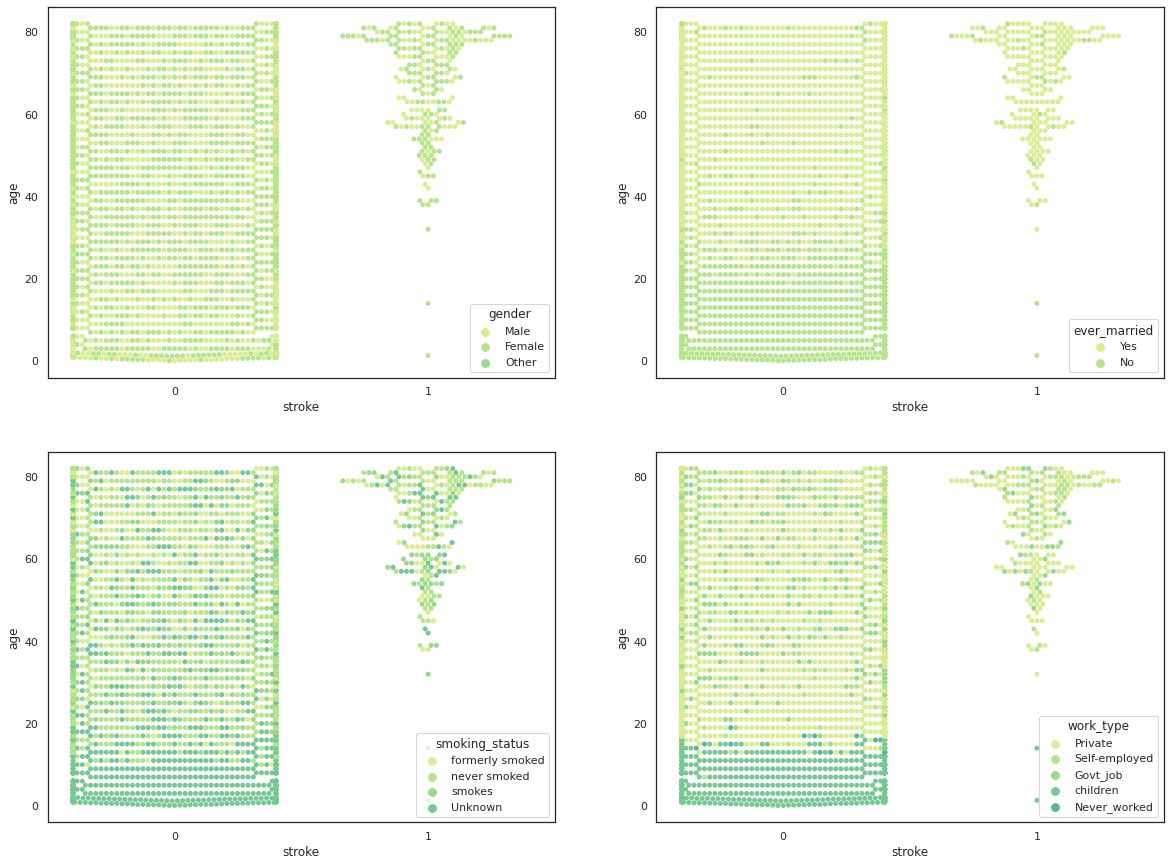

In [29]:
import seaborn as sns
sns.set_theme(style="white")

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.swarmplot(x="stroke", y="age",hue="gender", data=df, palette=knn_palette)

plt.subplot(2,2,2)
sns.swarmplot(x="stroke", y="age",hue="ever_married", data=df, palette=knn_palette)

plt.subplot(2,2,3)
sns.swarmplot(x="stroke", y="age",hue="smoking_status", data=df, palette=knn_palette)

plt.subplot(2,2,4)
sns.swarmplot(x="stroke", y="age",hue="work_type", data=df, palette=knn_palette)

plt.show()

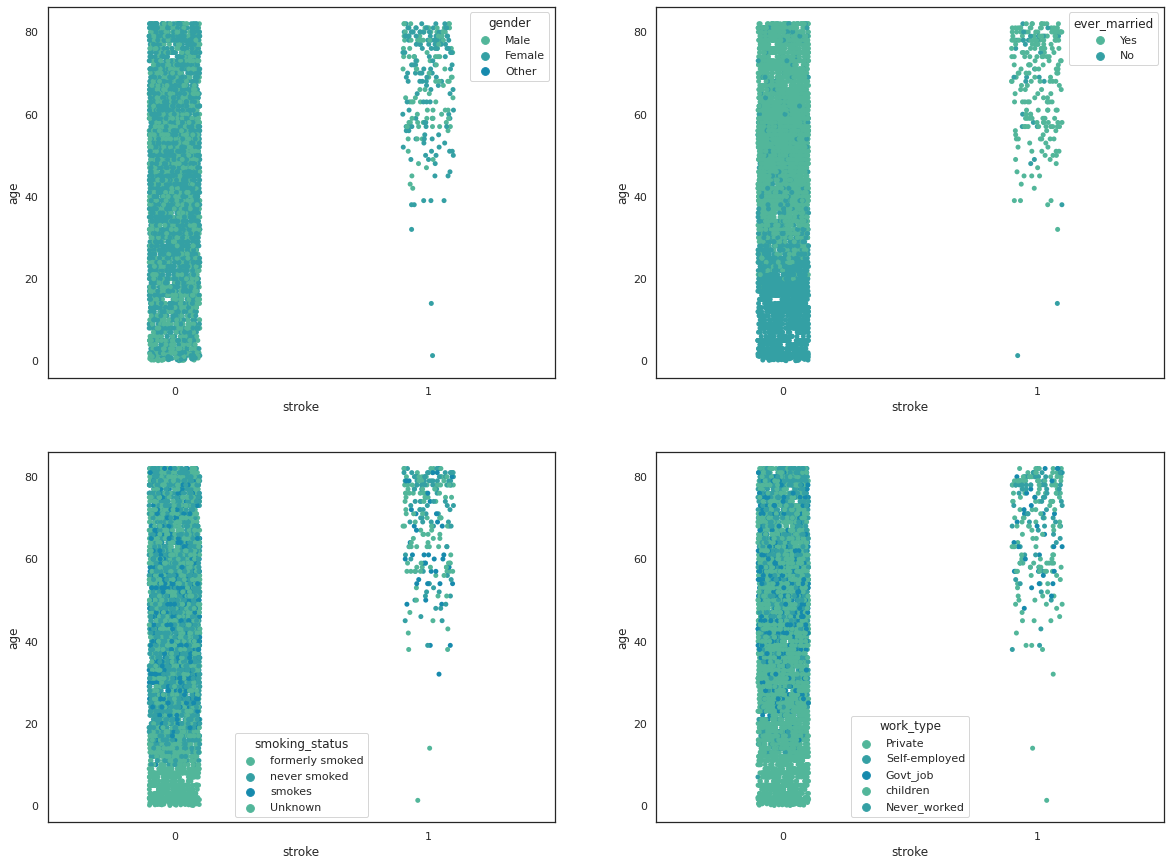

In [30]:
import seaborn as sns
sns.set_theme(style="white")

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.stripplot(x="stroke", y="age",hue="gender", data=df, palette=knn_palette[4:])

plt.subplot(2,2,2)
sns.stripplot(x="stroke", y="age",hue="ever_married", data=df, palette=knn_palette[4:])

plt.subplot(2,2,3)
sns.stripplot(x="stroke", y="age",hue="smoking_status", data=df, palette=knn_palette[4:])

plt.subplot(2,2,4)
sns.stripplot(x="stroke", y="age",hue="work_type", data=df, palette=knn_palette[4:])

plt.show()


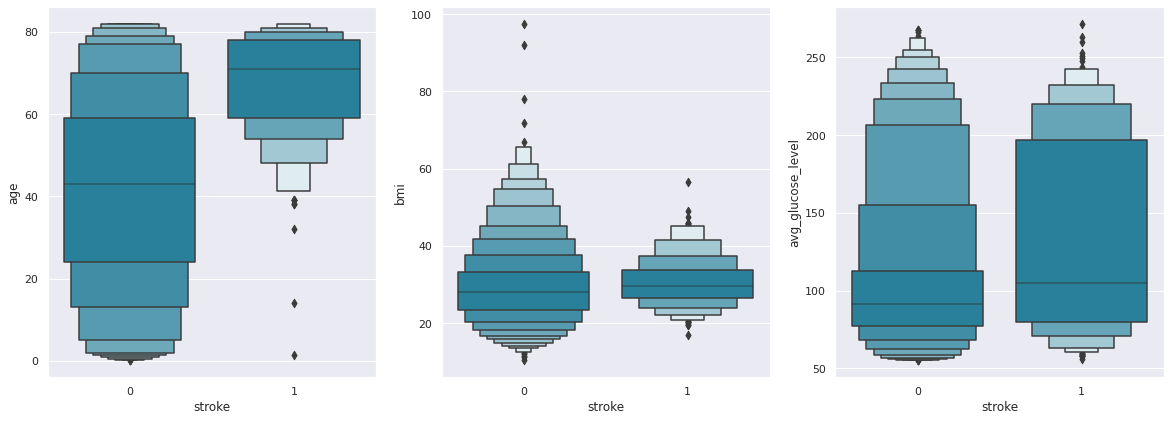

In [31]:
sns.set_theme(style="darkgrid")


plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxenplot(x=df['stroke'], y=df['age'],
              palette=knn_palette[6:], 
              scale="linear", data=df)

plt.subplot(2,3,2)
sns.boxenplot(x=df['stroke'], y=df['bmi'],
              palette=knn_palette[6:], 
              scale="linear", data=df)

plt.subplot(2,3,3)
sns.boxenplot(x=df['stroke'], y=df['avg_glucose_level'],
              palette=knn_palette[6:], 
              scale="linear", data=df);

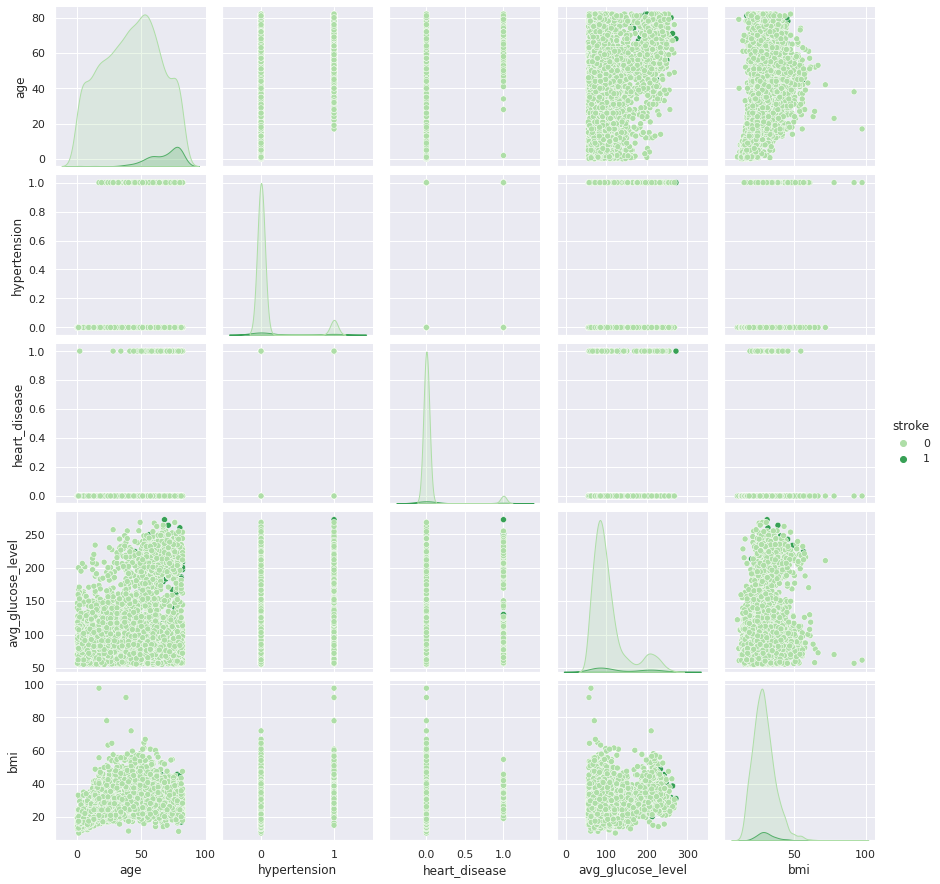

In [32]:
sns.pairplot(df, hue = 'stroke', palette = 'Greens');

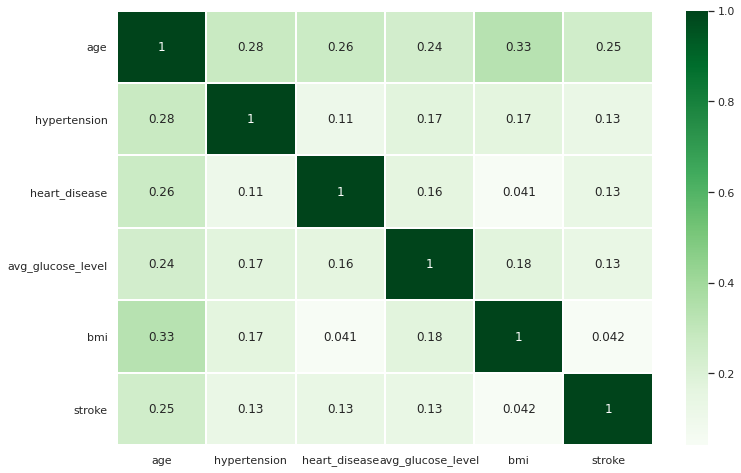

In [33]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Greens', linewidths = 2)
plt.show()

<center><h1 style = "background:#99d98c ;color:black;border:0;font-weight:bold">Missing Values</h1></center>

In [34]:
df[df['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


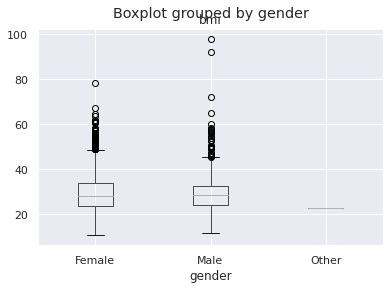

In [35]:
df.boxplot(column="bmi",by = "gender")
plt.show()

In [36]:
print("Mean of BMI value for Females: ", np.mean(df[df['gender'] == 'Female']['bmi']))
print("Mean of BMI value for Males: ", np.mean(df[df['gender'] == 'Male']['bmi']))
print("Mean of BMI value: ", np.mean(df['bmi']))

Mean of BMI value for Females:  29.065757680359038
Mean of BMI value for Males:  28.647936350074616
Mean of BMI value:  28.893236911794673


In [37]:
df['bmi'] = df['bmi'].fillna(0)

In [38]:
for i in range(0,5035):
    if(df['bmi'][i] == 0):
        if(df['gender'][i] == 'Male'):
            df['bmi'][i] = 28.594683544303823
        elif(df['gender'][i] == 'Female'):
            df['bmi'][i] = 29.035926055109936
        else:
            df['bmi'][i] = 28.854652338161664

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<center><h1 style = "background:#99d98c ;color:black;border:0;font-weight:bold">Encoding</h1></center>

In [40]:
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [41]:
encoding_list =  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

one_hot_encoding_list = []
label_encoding_list = []

for i in range (0, len(encoding_list)):
    if(len(df[f'{encoding_list[i]}'].unique()) == 2):
        label_encoding_list.append(encoding_list[i])
    else:
        one_hot_encoding_list.append(encoding_list[i])
    print(f'Unique Values for {encoding_list[i]}', df[f'{encoding_list[i]}'].unique())

Unique Values for gender ['Male' 'Female' 'Other']
Unique Values for ever_married ['Yes' 'No']
Unique Values for work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique Values for Residence_type ['Urban' 'Rural']
Unique Values for smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## One-Hot Encoding

In [42]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [43]:
for i in range(0, len(one_hot_encoding_list)):
    df[f'{one_hot_encoding_list[i]}'] = pd.Categorical(df[f'{one_hot_encoding_list[i]}'])
    dummies = pd.get_dummies(df[f'{one_hot_encoding_list[i]}'], prefix = f'{one_hot_encoding_list[i]}_encoded')
    df.drop([f'{one_hot_encoding_list[i]}'], axis=1, inplace=True)
    df = pd.concat([df, dummies], axis=1)

## Label Encoding

In [44]:
ever_married_mapping = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(ever_married_mapping)

In [45]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
df['Residence_type'] = df['Residence_type'].map(Residence_type_mapping)

In [46]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,29.035926,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,0.000000,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,0


<center><h1 style = "background:#99d98c ;color:black;border:0;font-weight:bold">Train - Test Split</h1></center>

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(['stroke'], axis = 1)
y = df.stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 5110
**************************************************
Total # of sample in train dataset: 3423
Shape of X_train: (3423, 19)
**************************************************
Total # of sample in test dataset: 1687
Shape of X_test: (1687, 19)


In [48]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<center><h1 style = "background:#76c893 ;color:black;border:0;font-weight:bold">K Nearest Neighbours</h1></center>

K-NN algorithm is one of the most used classification algorithm. K-NN is a non-parametric and lazy learning algorithm. Although it is used in the solution of both classification and regression problems, it is mostly used in the solution of classification problems. Unlike Eager learning, lazy learning does not have a training stage. It does not learn the training data but instead memorizes the training data set. When asked to make a forecast, it looks for the nearest neighbors across the entire data set. The distance of the new data to be included in the sample data set is calculated according to the existing data and k number of close neighborhoods are checked. Generally, 3 types of distance functions are used for distance calculations: Euclidean Distance, Manhattan Distance, and Minkowski Distance.

<html>
\[Euclidean = \sqrt{\sum_{i=1}^{k} (x_i - y_i)^2} \]
</html>

<html>
\[Manhattan = \sum_{i=1}^{k} |x_i - y_i| \]
</html>

<html>
\[Minkowski = \sum_{i=1}^{k} (|x_i - y_i|)^4)^{1/q} \] 
</html>




There are 3 indicators that are generally used to measure the performance of a model produced with the KNN (K-Nearest Neighbors) Algorithm.

**Jaccard Index:** It is the ratio of the intersection set of the correct prediction set and the true value set to their union set. It takes a value between 1 and 0. 1 means best achievement.

**F1-Score:** It is calculated from the Precission and Recall values calculated over the Confusion Matrix. Pre=TP/(TP+FP) Rec=TP/(TP+FN) F1-Score= 2((PreRec)/(Pre+Rec)) It takes a value between 1 and 0. 1 means best achievement.

**LogLoss:** At the end of Logistic Regression, the LogLoss value is calculated over the probabilities of the predictions. It takes values between 1 and 0. Unlike the two values above, 0 means best performance.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)

train_score = knn_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = knn_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 95.53023663453112
Test score of trained model: 94.3687018375815


<center><h1 style = "background:#474747 ;color:white;border:0;font-weight:bold">Classification Evaluation Metrics</h1></center>

Evaluation metrics are used to measure the quality of the statistical or machine learning model. Evaluating machine learning models or algorithms is essential for any project. There are many different types of evaluation metrics available to test a model. These include classification accuracy, logarithmic loss, confusion matrix, and others. 

***Why is this Useful?***

It is very important to use multiple evaluation metrics to evaluate your model. This is because a model may perform well using one measurement from one evaluation metric, but may perform poorly using another measurement from another evaluation metric. Using evaluation metrics are critical in ensuring that your model is operating correctly and optimally. 

***Applications of Evaluation Metrics***
* Statistical Analysis

* Machine Learning

Source: https://deepai.org/machine-learning-glossary-and-terms/evaluation-metrics

## Confusion Matrix

Confusion matrix is a measurement tool that provides information about the accuracy of predictions. The logic behind it is actually simple, but it is often used especially in classification algorithms as it provides easy to understand information about the accuracy of the measurement.

Confussion Matrix: 
[[1590   90]
 [   5    2]]



<AxesSubplot:>

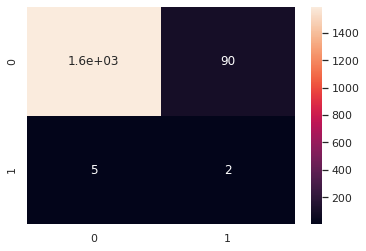

In [50]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(pred, y_test)

print(f'Confussion Matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)

**TP - True Positive:** The model correctly predicted the positive class as a positive class.

**FP - False Positive:** The model predicted the negative class as a false positive class.

**FN - False Negative:** The model predicted the positive class as false, negative class.

**TN - True Negative:** The model predicted the negative class correctly.

In [51]:
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

**Accuracy Rate:** A measure of how often the classifier predicts correctly.

**Precision:** It shows how many of the values we guess as Positive are actually Positive.

**Recall:** It is a measure of how much the classifier correctly predicts the true positive value. Also known as Sensitivity, Accuracy or Recall. (Sensitivity, Hit Rate or Recall) It should be as high as possible.

**F1 Score:** F1 Score value shows the harmonic mean of Precision and Recall values. The reason why it is a harmonic average instead of a simple average is that we should not ignore extreme cases. If there was a simple average calculation, the F1 Score of a model with a Precision value of 1 and a Recall value of 0 would come as 0.5, and this would mislead us.

**Specificity:** It is a measure of how much the classifier correctly predicted the true negative value.

**Misclassification Rate (Error Rate):** It is a measure of how often the classifier guesses incorrectly. Also known as Error Rate.

**Prevalence:** It is the measure of how often a value of 1 is found at the end of the estimation.

**Miss Rate:** It is the ratio of those predicted to be 0 despite the real value being 1. Also known as loss rate.

**Fall out:** It is the ratio of those predicted to be 1 even though the real value is 0. 

In [52]:
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp) # True Negative Rate
error_rate = (fp + fn) / total # Missclassification Rate
prevalence = real_positive / total
miss_rate = fn / real_positive # False Negative Rate
fall_out = fp / real_negative # False Positive Rate

print(f'Accuracy    : {accuracy*100}')
print(f'Precision   : {precision*100}')
print(f'Recall      : {recall*100}')
print(f'F1 score    : {f1score*100}')
print(f'Specificity : {specificity*100}')
print(f'Error Rate  : {error_rate*100}')
print(f'Prevalence  : {prevalence*100}')
print(f'Miss Rate   : {miss_rate*100}')
print(f'Fall Out    : {fall_out*100}')

Accuracy    : 94.3687018375815
Precision   : 2.1739130434782608
Recall      : 28.57142857142857
F1 score    : 4.040404040404041
Specificity : 94.64285714285714
Error Rate  : 5.631298162418495
Prevalence  : 0.4149377593360996
Miss Rate   : 71.42857142857143
Fall Out    : 5.357142857142857


## Classification Report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1595
           1       0.29      0.02      0.04        92

    accuracy                           0.94      1687
   macro avg       0.62      0.51      0.51      1687
weighted avg       0.91      0.94      0.92      1687



## Jaccard Similarity Coefficient Score

The Jaccard index, or Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true.

The Jaccard similarity coefficient of the <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>i</mi>
</math>-th samples, with a ground truth label set <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
</math>
 and predicted label set <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mrow>
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
</math>
, is defined as

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>J</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo>,</mo>
  <msub>
    <mrow>
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mo stretchy="false">|</mo>
      <msub>
        <mi>y</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x2229;</mo>
      <msub>
        <mrow>
          <mover>
            <mi>y</mi>
            <mo stretchy="false">^</mo>
          </mover>
        </mrow>
        <mi>i</mi>
      </msub>
      <mo stretchy="false">|</mo>
    </mrow>
    <mrow>
      <mo stretchy="false">|</mo>
      <msub>
        <mi>y</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x222A;</mo>
      <msub>
        <mrow>
          <mover>
            <mi>y</mi>
            <mo stretchy="false">^</mo>
          </mover>
        </mrow>
        <mi>i</mi>
      </msub>
      <mo stretchy="false">|</mo>
    </mrow>
  </mfrac>
  <mo>.</mo>
</math>

In [54]:
from sklearn import metrics
print("jaccard            :", metrics.jaccard_score(y_test, pred)*100)

jaccard            : 2.0618556701030926


## Log Loss

Log loss, aka logistic loss or cross-entropy loss.

This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true. The log loss is only defined for two or more labels. For a single sample with true label <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>&#x2208;</mo>
  <mo fence="false" stretchy="false">{</mo>
  <mn>0</mn>
  <mo>,</mo>
  <mn>1</mn>
  <mo fence="false" stretchy="false">}</mo>
</math> and a probability estimate <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>p</mi>
  <mo>=</mo>
  <mi>Pr</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math>, the log loss is:


<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>p</mi>
  <mo>=</mo>
  <mi>Pr</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math>

In [55]:
print("neg_log_loss       :", metrics.log_loss(y_test, pred)*100)

neg_log_loss       : 194.4983850328196


<center><h1 style = "background:#168aad ;color:black;border:0;font-weight:bold">Hyper-Parameter Optimization</h1></center>


## Parameters of sklearn.KNeighborsClassifier

<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Parameter</th>
    <th>Explanation</th>
    <th>Default</th>
  </tr>
  <tr>
    <td>n_neighbors</td>
    <td>This parameter refers to the number of neighbors and used to calculate the between selected number of neighbors and data point.</td>
    <td>5 (int)</td>
  </tr>
  <tr>
    <td>algorithm</td>
    <td>It takes an algorithm to use for computing the nearest neighbors. Parameters it can take are 'auto', 'ball_tree', 'kd_tree', 'brute'. Default value of algorithms is auto.</td>
    <td>'auto'</td>
  </tr>
  <tr>
    <td>weights</td>
    <td>Another key parameter for kNN is weights. Both 'uniform' and 'distance' weight functions could be used. In uniform points in each neighbor are weighted the same. In distance, closer neighbors have greater impact than the ones further away.</td>
    <td>'uniform'</td>
  </tr>
  <tr>
    <td>metric</td>
    <td>Metrics are important parameters for kNN algorithm. These values of metric(Euclidean, Manhattan, Minkowski) are used to calculate the distances.</td>
    <td>'minkowski'</td>
  </tr>
</table>

</body>
</html>

In [56]:
parameters = {'n_neighbors': [5,6,7,8,9,15,20],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski', 'cosine', 'jaccard', 'hamming'],
             }

gcv = GridSearchCV(knn_model, parameters, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 1668 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:   54.5s finished


In [57]:
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')

GridSearchView Best Score: 95.44269432705852
GridSearchView Best Estimator: KNeighborsClassifier(algorithm='brute', metric='hamming', n_neighbors=6,
                     weights='distance')
GridSearchView Best Params: {'algorithm': 'brute', 'metric': 'hamming', 'n_neighbors': 6, 'weights': 'distance'}


<AxesSubplot:>

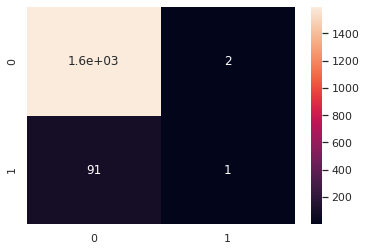

In [58]:
grid_predictions = gcv.predict(X_test)

cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)

In [59]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1595
           1       0.33      0.01      0.02        92

    accuracy                           0.94      1687
   macro avg       0.64      0.50      0.50      1687
weighted avg       0.91      0.94      0.92      1687



<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">Logistic Regression</h1></center>

Logistic regression is a method used to determine the cause-effect relationship with the explanatory variables when the response variable is observed in categorical and multiple categories. It is a regression method in which the expected values of the response variable according to the explanatory variables are obtained as probabilities. Logistic regression analysis is a regression method that helps classification and assignment. There is no normal distribution assumption, continuity assumption prerequisite. The effects of the explanatory variables on the dependent variable are obtained as probabilities and the risk factors are determined as probabilities.

In [60]:
logreg_palette = ['#590d22', '#800f2f', '#a4133c', '#c9184a', '#ff4d6d', '#ff758f', '#ff8fa3']

<center><h1 style = "background:#590d22 ;color:white;border:0;font-weight:bold">Information About Dataset</h1></center>

In [61]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
121,86517,M,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.145700,0.08665,...,24.90,145.40,1549.0,0.15030,0.22910,0.32720,0.16740,0.2894,0.08456,NaN
156,8711202,M,17.68,20.74,117.40,963.7,0.11150,0.16650,0.185500,0.10540,...,25.11,132.90,1302.0,0.14180,0.34980,0.35830,0.15150,0.2463,0.07738,NaN
530,91858,B,11.75,17.56,75.89,422.9,0.10730,0.09713,0.052820,0.04440,...,27.98,88.52,552.3,0.13490,0.18540,0.13660,0.10100,0.2478,0.07757,NaN
51,857373,B,13.64,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.01723,...,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,NaN
500,914862,B,15.04,16.74,98.73,689.4,0.09883,0.13640,0.077210,0.06142,...,20.43,109.70,856.9,0.11350,0.21760,0.18560,0.10180,0.2177,0.08549,NaN
283,8912280,M,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.09052,...,25.09,126.90,1031.0,0.13650,0.47060,0.50260,0.17320,0.2770,0.10630,NaN
377,9013579,B,13.46,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.01117,...,35.63,97.11,680.6,0.11080,0.14570,0.07934,0.05781,0.2694,0.07061,NaN
350,899187,B,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,NaN
74,8610175,B,12.31,16.52,79.19,470.9,0.09172,0.06829,0.033720,0.02272,...,23.21,89.71,611.1,0.11760,0.18430,0.17030,0.08660,0.2618,0.07609,NaN
168,8712766,M,17.47,24.68,116.10,984.6,0.10490,0.16030,0.215900,0.10430,...,32.33,155.30,1660.0,0.13760,0.38300,0.48900,0.17210,0.2160,0.09300,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [63]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [64]:
df.drop("id", axis=1, inplace=True)
df.drop("Unnamed: 32", axis=1, inplace=True)

<center><h1 style = "background:#800f2f ;color:white;border:0;font-weight:bold">Data Visualization</h1></center>

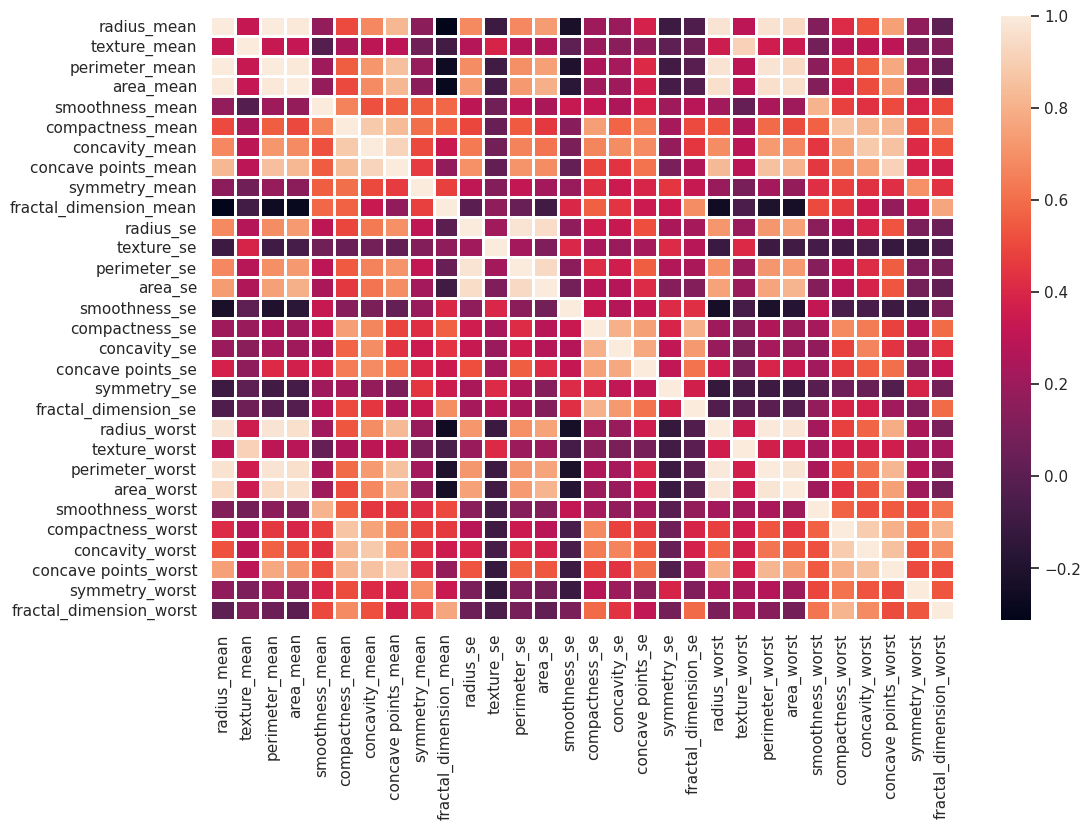

In [65]:
plt.figure(figsize=(12,8), dpi = 100) 
sns.heatmap(df.corr(), annot=False, color = logreg_palette, linewidths = 2)
plt.show()

<center><h1 style = "background:#a4133c ;color:white;border:0;font-weight:bold">Anomaly Detection</h1></center>

Anomaly is one that differs / deviates significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. The tag just tells you if it's abnormal. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.

In [66]:
#This code is retrieved from here: https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda#Introduction
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [67]:
columns = list(df.columns)
columns.remove('diagnosis')

In [68]:
df.loc[detect_outliers(df,columns)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,M,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,M,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.27,22.04,152.10,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,B,13.24,20.13,86.87,542.9,0.08284,0.1223,0.1010,0.02833,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.1357,0.2845,0.12490
485,B,12.45,16.41,82.85,476.7,0.09514,0.1511,0.1544,0.04846,0.2082,...,13.78,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.1342,0.3231,0.10340
242,B,11.30,18.19,73.93,389.4,0.09592,0.1325,0.1548,0.02854,0.2054,...,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970
15,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,...,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


In [69]:
# drop outliers
df = df.drop(detect_outliers(df,columns),axis = 0).reset_index(drop = True)

<center><h1 style = "background:#c9184a ;color:white;border:0;font-weight:bold">Skewness</h1></center>

It can be said that skewness is the name given to the distortion of symmetry in data distribution in continuous or in other words, non-categorical data sets. In other words, it is the criterion of asymmetry. In summary, it is expected that the distribution of the data sets will show a normal distribution, but if the available data is contrary to this, it can be mentioned that the data is skewed. These distortions are among the reasons that prevent some machine learning models from learning from data, similar to the effect of imbalanced datasets used for categorical data.

In the image below, there is a graph showing the number of records belonging to three different data sets. In the data set with a symmetrical distribution as in the green graph, mode median and mean values are equal. In other words, the most frequently found number is both the median number and the average. The situation in the orange graph is expressed as positive skewness, and the situation in the blue graph as negative skewness.

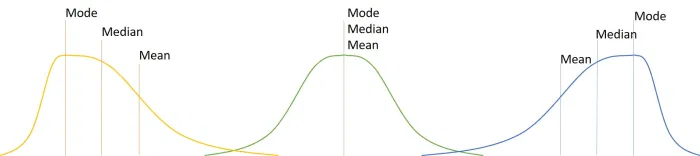

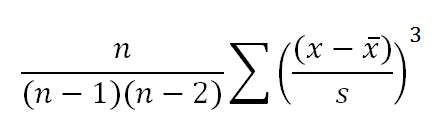

* In the formula, n is the number of samples, xm is the arithmetic mean of the array (sample mean), and 's' is its standard deviation.

* As the value of skewness moves towards plus infinity, the force of negative skewness increases as it moves towards positive and minus infinity.

*Source for this explanation:* https://teachtomachines.com/2020/07/07/log-donusumu-ile-carpiklik-giderme/


In [70]:
df.agg(['skew'])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
skew,0.660586,0.750118,0.668906,1.093732,0.236562,0.710238,1.047522,0.96977,0.343596,0.585157,...,0.877245,0.463801,0.855389,1.345906,0.364458,1.033678,0.80068,0.436446,0.935839,1.072528


In [71]:
skews = ['area_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'fractal_dimension_worst' ]

In [72]:
from scipy.stats import norm, skew, boxcox
for i in skews:
    (mu, sigma) = norm.fit(df[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()
    
    df[i], lam = boxcox(df[i])

    (mu, sigma) = norm.fit(df[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()

mu area_mean : 601.6102880658435, sigma area_mean : 262.96876079377745

mu area_mean : 4.474999363813625, sigma area_mean : 0.19957812772383882

mu radius_se : 0.3458720164609053, sigma radius_se : 0.16510963036711943

mu radius_se : -1.347889398931522, sigma radius_se : 0.5728143719080517

mu perimeter_se : 2.414631069958848, sigma perimeter_se : 1.141204165181345

mu perimeter_se : 0.6976815356094274, sigma perimeter_se : 0.3702301006660259

mu area_se : 31.278436213991768, sigma area_se : 21.674493120720726

mu area_se : 1.9266162233744832, sigma area_se : 0.18616040398338882

mu smoothness_se : 0.006740693415637861, sigma smoothness_se : 0.002424647529141902

mu smoothness_se : -8.985008093629462, sigma smoothness_se : 0.9721735496181008

mu compactness_se : 0.02111758230452675, sigma compactness_se : 0.01166169067377445

mu compactness_se : -2.8620445210357333, sigma compactness_se : 0.27842715540162155

mu symmetry_se : 0.019453098765432098, sigma symmetry_se : 0.0062373127297748

<center><h1 style = "background:#ff4d6d ;color:white;border:0;font-weight:bold">Encoding</h1></center>

In [73]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [74]:
diagnosis_mapping = {'M': 0, 'B': 1}
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)

<center><h1 style = "background:#ff758f ;color:white;border:0;font-weight:bold">Train-Test Split</h1></center>

In [75]:
features = columns
label = ['diagnosis']

X = df[features]
y = df[label]

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 486
**************************************************
Total # of sample in train dataset: 325
Shape of X_train: (325, 30)
**************************************************
Total # of sample in test dataset: 161
Shape of X_test: (161, 30)


In [77]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<center><h1 style = "background:#ff8fa3 ;color:white;border:0;font-weight:bold">Logistic Regression</h1></center>

In [78]:
from sklearn.linear_model import LogisticRegression

logReg_model = LogisticRegression()
logReg_model.fit(X_train, y_train)
pred = logReg_model.predict(X_test)

train_score = logReg_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = logReg_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 99.07692307692308
Test score of trained model: 98.13664596273291


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confussion Matrix: 
[[ 44   1]
 [  2 114]]



<AxesSubplot:>

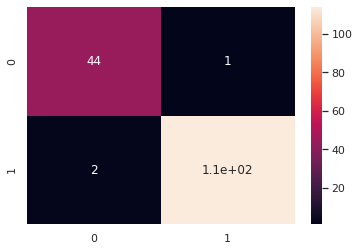

In [79]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(pred, y_test)

print(f'Confussion Matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.98      0.99      0.99       115

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.98       161
weighted avg       0.98      0.98      0.98       161



<center><h1 style = "background:#ff8fc4 ;color:white;border:0;font-weight:bold">Hyper-Parameter Optimization</h1></center>

## Parameters of sklearn.KNeighborsClassifier

<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Parameter</th>
    <th>Explanation</th>
    <th>Default</th>
  </tr>
  <tr>
    <td>penalty</td>
    <td>Used to indicate the norm used in penalization. It takes 'l1', 'l2', 'elasticnet', 'none' values.</td>
    <td>'l2'</td>
  </tr>
  <tr>
    <td>C</td>
    <td>Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.</td>
    <td>1.0 (float)</td>
  </tr>
  <tr>
    <td>solver</td>
    <td><ul class="simple">
<li><p>For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and
‘saga’ are faster for large ones.</p></li>
<li><p>For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
handle multinomial loss; ‘liblinear’ is limited to one-versus-rest
schemes.</p></li>
<li><p>‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty</p></li>
<li><p>‘liblinear’ and ‘saga’ also handle L1 penalty</p></li>
<li><p>‘saga’ also supports ‘elasticnet’ penalty</p></li>
<li><p>‘liblinear’ does not support setting <code class="docutils literal notranslate"><span class="pre">penalty='none'</span></code></p></li>
</ul>
      </td>
    <td>'lbfgs'</td>
  </tr>
 
</table>

</body>
</html>

In [81]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty': ['l1', 'l2'],
               'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'solver': ['liblinear', 'saga'],
             }

gcv = GridSearchCV(logReg_model, parameters, cv=5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [82]:
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')

GridSearchView Best Score: 97.84615384615385
GridSearchView Best Estimator: LogisticRegression(C=0.1, solver='saga')
GridSearchView Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


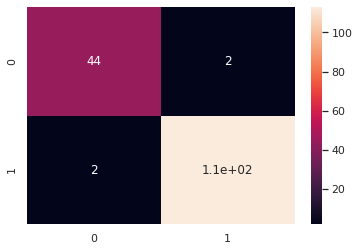

In [83]:
grid_predictions = gcv.predict(X_test)

cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True);

In [84]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.98      0.98      0.98       115

    accuracy                           0.98       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.98      0.98      0.98       161



# Conclusion

We have come to the end of the notebook. I covered three machine learning classification algorithms in this notebook. I hope you liked it.

* If you have questions, please comment them. I will try to explain if you don't understand.
* Waiting for your positive and negative comments. :)

Thank you for your time.

## In addition:

* You can check my other notebook which is about Regression Techniques. It has same format as this notebook. Click: [REGRESSION MASTER NOTEBOOK](https://www.kaggle.com/barisscal/regression-master-notebook)